# INFO 3402 – Week 13: Assignment

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import linregress

In [2]:
counties_df = pd.read_csv('us_counties.csv',dtype={'fips':str}).set_index('fips')
counties_df.head()

,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


## Question 1: Guess the Correlation (10 pts)

Play a few rounds of [GuessTheCorrelation.com](http://guessthecorrelation.com/). What was your high score? (1 pt)

What kinds of relationships were harder to accurately guess? Why? What did you learn that helped improve your performance over a few rounds? (2 pts)

Guess the correlations for Relationship A and B in the figure below. Any guess with a correct direction will get full credit. (1 pt)

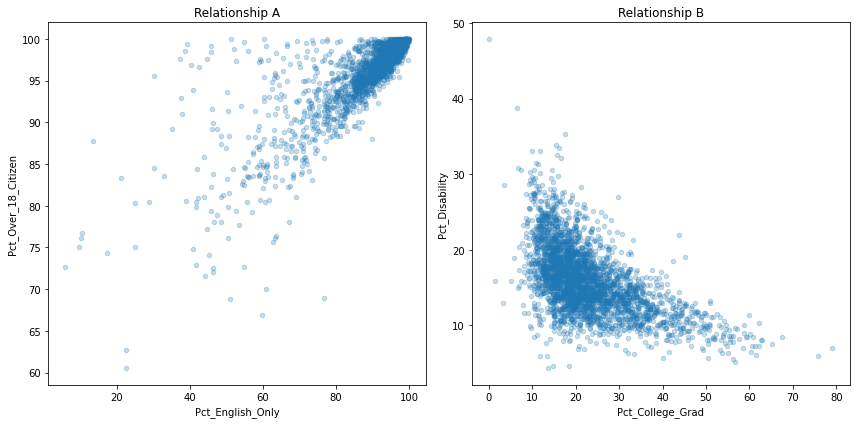

In [3]:
f,(ax0,ax1) = plt.subplots(1,2,figsize=(12,6))

counties_df.plot.scatter(x='Pct_English_Only',y='Pct_Over_18_Citizen',ax=ax0,alpha=.25)
counties_df.plot.scatter(x='Pct_College_Grad',y='Pct_Disability',ax=ax1,alpha=.25)

ax0.set_title('Relationship A')
ax1.set_title('Relationship B')

f.tight_layout()

Report the true correlations for both relationships. (2 pts)

Interpret the slope for each of these linear regressions for these relationships. (4 pts)

In [4]:
linregress(
    x = counties_df['Pct_English_Only'].fillna(counties_df['Pct_English_Only'].mean()),
    y = counties_df['Pct_Over_18_Citizen'].fillna(counties_df['Pct_Over_18_Citizen'].mean())
)

LinregressResult(slope=0.29687565292347334, intercept=69.98774740565949, rvalue=0.8239055756500892, pvalue=0.0, stderr=0.0035574877135954495, intercept_stderr=0.3243690075592116)

In [5]:
linregress(
    x = counties_df['Pct_College_Grad'].fillna(counties_df['Pct_College_Grad'].mean()),
    y = counties_df['Pct_Disability'].fillna(counties_df['Pct_Disability'].mean())
)

LinregressResult(slope=-0.2622418132676733, intercept=21.92572665856482, rvalue=-0.5675090789810732, pvalue=1.8595638218071432e-280, stderr=0.006628189950847082, intercept_stderr=0.16252359571859123)

## Question 2: Counterfactual thinking (10 pts)

For Relationship A, what is the more likely causal direction and why? (2 pts)

Identify and describe some threats to the internal validity of Relationship A. (3 pts)

For Relationship B, what is the more likely causal direction and why? (2 pts)

Identify and describe some threats to the internal validity of Relationship B. (3 pts)

## Question 3: Causal relations in MA05 (10 pts)

Describe the variables and the relationship you are planning to use for Module Assignment 05. (3 pts)

Use `linregress` to fit a regression model for your variables and interpret the slope parameter. (3 pts)

Describe the more likely causal direction between these variables. (1 pts)

Identify and describe some threats to the internal validity of this relationship. (3 pts)